# 6. ENSO

This notebook provides an overview of running the [ENSO Metrics package](https://github.com/CLIVAR-PRP/ENSO_metrics) through the PMP. More information can be found in the [README]( ). Example parameter files are located in the [PMP sample setups]( ). 

**Reference**: Planton, Y., E. Guilyardi, A. T. Wittenberg, J. Lee, P. J. Gleckler, T. Bayr, S. McGregor, M. J. McPhaden, S. Power, R. Roehrig, A. Voldoire, 2020: Evaluating El Niño in climate models with the CLIVAR 2020 ENSO metrics package. Bulletin of the American Meteorological Society. [doi: 10.1175/BAMS-D-19-0337.1](https://doi.org/10.1175/BAMS-D-19-0337.1)

Description for individual metrics can be found at https://github.com/CLIVAR-PRP/ENSO_metrics/wiki.

## Download demo data

The ENSO metrics demo requires downloading a large sample data set (size 10.8 GB). The ENSO metric requires a different set of sample data than the rest of the PMP metrics. This section of the notebook will download that data to your chosen location and generate a basic parameter file.

In [1]:
# Lets get the file containing the data needed for this demo
import requests
r = requests.get("https://pcmdiweb.llnl.gov/pss/pmpdata/pmp_enso_tutorial_files.v20210823.txt")
with open("enso_data_files.txt","wb") as f:
    f.write(r.content)

If you want to change the location where the demo data and output are stored, you can do so here:

In [2]:
# This is where you will be downloading the sample_data
demo_data_directory = "demo_data"
# this line is where your output will be stored
demo_output_directory = "demo_output"

Then download the data. The total sample data size is 10.8 GB. This will take several minutes.

In [3]:
# Let's download the files
from pcmdi_metrics.io.base import download_sample_data_files
try:
    download_sample_data_files("enso_data_files.txt", demo_data_directory)
    print("All files downloaded")
except:
    print("Download failed")

All files downloaded


After downloading the data, we generate the parameter file for this demo.

In [4]:
from download_sample_data import generate_parameter_files
filenames=["basic_enso_param.py.in"]
generate_parameter_files(demo_data_directory, demo_output_directory, filenames=filenames)

Preparing parameter file: basic_enso_param.py
Saving User Choices


In [5]:
# To open and display one of the graphics
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import rcParams

import os

%matplotlib inline

## Usage

The ENSO driver can be run from the command line as `enso_driver.py`. In this notebook, we will use bash cell magic (cells beginning with `%%bash`) to run the ENSO driver as a subprocess.

For help, type:  
```
enso_driver.py --help
```

In [6]:
%%bash
enso_driver.py --help

usage: enso_driver.py [-h] [--parameters PARAMETERS]
                      [--diags OTHER_PARAMETERS [OTHER_PARAMETERS ...]]
                      [--mip MIP] [--exp EXP] [--modpath MODPATH]
                      [--modpath_lf MODPATH_LF]
                      [--modnames MODNAMES [MODNAMES ...]] [-r REALIZATION]
                      [--reference_data_path REFERENCE_DATA_PATH]
                      [--reference_data_lf_path REFERENCE_DATA_LF_PATH]
                      [--metricsCollection METRICSCOLLECTION]
                      [--json_name JSON_NAME] [--netcdf_name NETCDF_NAME]
                      [--results_dir RESULTS_DIR] [--case_id CASE_ID]
                      [--obs_catalogue OBS_CATALOGUE]
                      [--obs_cmor_path OBS_CMOR_PATH] [-d [DEBUG]]
                      [--obs_cmor [OBS_CMOR]] [--nc_out [NC_OUT]]

options:
  -h, --help            show this help message and exit
  --parameters PARAMETERS, -p PARAMETERS
  --diags OTHER_PARAMETERS [OTHER_PARAMETERS ..

### Basic example

Parameters for the ENSO Metrics can be set on the command line or using a parameter file. This first example will use a parameter file, which is shown below.

In [7]:
with open("basic_enso_param.py") as f:
    print(f.read())

import os

#
#  OPTIONS ARE SET BY USER IN THIS FILE AS INDICATED BELOW BY:
#
#

# MODELS
modnames = ['ACCESS1-0']
mip = 'cmip5'  # cmip5, cmip6
exp = 'historical'  # historical, piControl
realization = 'r1i1p1'
modpath = 'demo_data/CMIP5_demo_data/%(variable)_Amon_%(model)_historical_%(realization)_185001-200512.nc'
modpath_lf = 'demo_data/CMIP5_demo_data/sftlf_fx_%(model)_amip_r0i0p0.nc'

# OBSERVATIONS
obs_cmor = True
obs_cmor_path = "demo_data/obs4MIPs_PCMDI_monthly"
obs_catalogue = "demo_data/obs4MIPs_PCMDI-CEM2021_monthly_bySource_catalogue_v20210805_demo.json"

# METRICS COLLECTION
metricsCollection = 'ENSO_perf'  # ENSO_perf, ENSO_tel, ENSO_proc

# OUTPUT
case_id = 'basicTestEnso'
results_dir = os.path.join('demo_output',case_id, metricsCollection)

json_name = '%(mip)_%(exp)_%(metricsCollection)_%(case_id)_%(model)_%(realization)'
netcdf_name = json_name
nc_out = True



The next cell runs the ENSO driver using the basic parameter file. This may take several minutes.

In [8]:
%%bash
enso_driver.py -p basic_enso_param.py

mip: cmip5
exp: historical
models: ['ACCESS1-0']
realization:  r1i1p1
mc_name: ENSO_perf
outdir: demo_output/basicTestEnso/ENSO_perf
netcdf_path: demo_output/basicTestEnso/ENSO_perf
debug: False
obs_cmor: True
obs_cmor_path: demo_data/obs4MIPs_PCMDI_monthly
egg_pth: /Users/lee1043/mambaforge/envs/pmp_devel_20241202/share/pmp
output directory for graphics:demo_output/basicTestEnso/ENSO_perf
output directory for diagnostic_results:demo_output/basicTestEnso/ENSO_perf
output directory for metrics_results:demo_output/basicTestEnso/ENSO_perf
list_variables: ['pr', 'sst', 'taux']
list_obs: ['AVISO-1-0', 'ERA-INT', 'GPCP-2-3', 'HadISST-1-1']
PMPdriver: dict_obs readin end
Process start:Wed Dec  4 00:54:46 2024
models: ['ACCESS1-0']
 ----- model:  ACCESS1-0  ---------------------
PMPdriver: var loop start for model  ACCESS1-0
realization: r1i1p1
 --- run:  r1i1p1  ---
 --- var:  pr  ---
var_in_file: pr
var, areacell_in_file, realm: pr areacella atmos
path:  demo_data/CMIP5_demo_data/pr_Amon_ACC

/Users/lee1043/mambaforge/envs/pmp_devel_20241202/lib/python3.10/site-packages/cdms2/MV2.py:318: Warning: arguments order for compress function has changed
it is now: MV2.copmress(array,condition), if your code seems to not react or act wrong to a call to compress, please check this
  warnings.warn(


     ComputeMetric: oneVarmetric = ERA-Interim
                         NOTE: Estimated landmask applied
     ComputeMetric: oneVarmetric = HadISST
                         NOTE: Estimated landmask applied
     ComputeCollection: metric = EnsoSeasonality
     ComputeMetric: oneVarmetric = ACCESS1-0_r1i1p1
               EnsoUvcdatToolsLib AverageMeridional
               EnsoUvcdatToolsLib AverageMeridional
               EnsoUvcdatToolsLib AverageMeridional
     ComputeMetric: oneVarmetric = ERA-Interim
                         NOTE: Estimated landmask applied
                         NOTE: Estimated landmask applied
                         NOTE: Estimated landmask applied
               EnsoUvcdatToolsLib AverageMeridional
               EnsoUvcdatToolsLib AverageMeridional
               EnsoUvcdatToolsLib AverageMeridional
     ComputeMetric: oneVarmetric = HadISST
                         NOTE: Estimated landmask applied


     %%%%%     -----     %%%%%
     ERROR    File /Users/

INFO::2024-12-04 01:02::pcmdi_metrics:: Results saved to a json file: /Users/lee1043/Documents/Research/git/pcmdi_metrics_20230620_pcmdi/pcmdi_metrics/doc/jupyter/Demo/demo_output/basicTestEnso/ENSO_perf/cmip5_historical_ENSO_perf_basicTestEnso_ACCESS1-0_r1i1p1.json
2024-12-04 01:02:55,116 [INFO]: base.py(write:422) >> Results saved to a json file: /Users/lee1043/Documents/Research/git/pcmdi_metrics_20230620_pcmdi/pcmdi_metrics/doc/jupyter/Demo/demo_output/basicTestEnso/ENSO_perf/cmip5_historical_ENSO_perf_basicTestEnso_ACCESS1-0_r1i1p1.json
2024-12-04 01:02:55,116 [INFO]: base.py(write:422) >> Results saved to a json file: /Users/lee1043/Documents/Research/git/pcmdi_metrics_20230620_pcmdi/pcmdi_metrics/doc/jupyter/Demo/demo_output/basicTestEnso/ENSO_perf/cmip5_historical_ENSO_perf_basicTestEnso_ACCESS1-0_r1i1p1.json
INFO::2024-12-04 01:03::pcmdi_metrics:: Results saved to a json file: /Users/lee1043/Documents/Research/git/pcmdi_metrics_20230620_pcmdi/pcmdi_metrics/doc/jupyter/Demo/dem

figure plotting start
metrics: ['BiasPrLatRmse', 'BiasPrLonRmse', 'BiasSstLonRmse', 'BiasTauxLonRmse', 'EnsoAmpl', 'EnsoDuration', 'EnsoSeasonality', 'EnsoSstDiversity_2', 'EnsoSstLonRmse', 'EnsoSstSkew', 'EnsoSstTsRmse', 'SeasonalPrLatRmse', 'SeasonalPrLonRmse', 'SeasonalSstLonRmse', 'SeasonalTauxLonRmse']
filename_js: demo_output/basicTestEnso/ENSO_perf/cmip5_historical_ENSO_perf_basicTestEnso_ACCESS1-0_r1i1p1.json
met: BiasPrLatRmse
filename_nc: demo_output/basicTestEnso/ENSO_perf/cmip5_historical_ENSO_perf_basicTestEnso_ACCESS1-0_r1i1p1_BiasPrLatRmse.nc
figure_name: cmip5_historical_ENSO_perf_ACCESS1-0_r1i1p1_BiasPrLatRmse
                    curve 01:03
                              took 0 minute(s)
                    map 01:03
                              took 0 minute(s)
figure plotting done
met: BiasPrLonRmse
filename_nc: demo_output/basicTestEnso/ENSO_perf/cmip5_historical_ENSO_perf_basicTestEnso_ACCESS1-0_r1i1p1_BiasPrLonRmse.nc
figure_name: cmip5_historical_ENSO_perf_ACCES

This run saved metrics to two files:  
- `basicTestEnso/ENSO_perf/cmip5_historical_ENSO_perf_basicTestEnso_ACCESS1-0_r1i1p1.json`  
- `basicTestEnso/ENSO_perf/cmip5_historical_ENSO_perf_basicTestEnso_ACCESS1-0_r1i1p1_diveDown.json`

diveDown metrics are not available in all cases. 

Example dive down (i.e., diagnostics) figures:

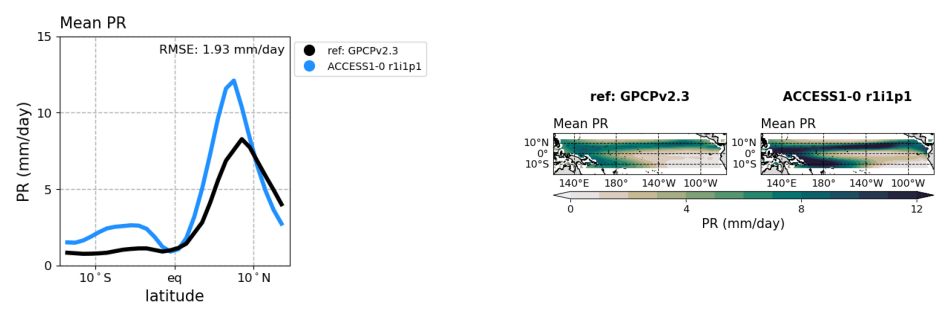

In [9]:
# figure size in inches optional
rcParams['figure.figsize'] = 12, 10

# path to images
plot1 = os.path.join(demo_output_directory,"basicTestEnso/ENSO_perf/cmip5_historical_ENSO_perf_ACCESS1-0_r1i1p1_BiasPrLatRmse_diagnostic_divedown01.png")
plot2 = os.path.join(demo_output_directory,"basicTestEnso/ENSO_perf/cmip5_historical_ENSO_perf_ACCESS1-0_r1i1p1_BiasPrLatRmse_diagnostic_divedown02.png")

# display images
fig, ax = plt.subplots(1,2); ax[0].axis('off'); ax[1].axis('off')
ax[0].imshow(mpimg.imread(plot1))
ax[1].imshow(mpimg.imread(plot2))

The results section of cmip5_historical_ENSO_perf_basicTestEnso_ACCESS1-0_r1i1p1.json is shown below.

In [10]:
import json
metrics_file=demo_output_directory+"/basicTestEnso/ENSO_perf/cmip5_historical_ENSO_perf_basicTestEnso_ACCESS1-0_r1i1p1.json"
with open(metrics_file) as f:
    results = json.load(f)["RESULTS"]["model"]["ACCESS1-0"]["r1i1p1"]["value"]
print(json.dumps(results, indent = 2))

{
  "BiasPrLatRmse": {
    "diagnostic": {
      "ACCESS1-0_r1i1p1": {
        "value": null,
        "value_error": null
      },
      "ERA-Interim": {
        "value": null,
        "value_error": null
      },
      "GPCPv2.3": {
        "value": null,
        "value_error": null
      }
    },
    "metric": {
      "ERA-Interim": {
        "value": 1.107530462384606,
        "value_error": null
      },
      "GPCPv2.3": {
        "value": 1.9301242972172137,
        "value_error": null
      }
    }
  },
  "BiasPrLonRmse": {
    "diagnostic": {
      "ACCESS1-0_r1i1p1": {
        "value": null,
        "value_error": null
      },
      "ERA-Interim": {
        "value": null,
        "value_error": null
      },
      "GPCPv2.3": {
        "value": null,
        "value_error": null
      }
    },
    "metric": {
      "ERA-Interim": {
        "value": 0.6464917771721341,
        "value_error": null
      },
      "GPCPv2.3": {
        "value": 1.4165839641155153,
        "value_e

### ENSO Metrics Collections

There are 3 metrics collections available:  
ENSO_perf  
ENSO_tel  
ENSO_proc  

They can be selected using the `--metricsCollection` flag. The first example used the "ENSO_perf" collection.

The next example runs the teleconnection collection. To save individual metrics in netCDF format, it uses the `--nc_out` flag.

In [11]:
%%bash -s "$demo_output_directory"
enso_driver.py -p basic_enso_param.py \
--metricsCollection ENSO_tel \
--results_dir $1/basicTestEnso/ENSO_tel \
--nc_out True

mip: cmip5
exp: historical
models: ['ACCESS1-0']
realization:  r1i1p1
mc_name: ENSO_tel
outdir: demo_output/basicTestEnso/ENSO_tel
netcdf_path: demo_output/basicTestEnso/ENSO_tel
debug: False
obs_cmor: True
obs_cmor_path: demo_data/obs4MIPs_PCMDI_monthly
egg_pth: /Users/lee1043/mambaforge/envs/pmp_devel_20241202/share/pmp
output directory for graphics:demo_output/basicTestEnso/ENSO_tel
output directory for diagnostic_results:demo_output/basicTestEnso/ENSO_tel
output directory for metrics_results:demo_output/basicTestEnso/ENSO_tel
list_variables: ['pr', 'sst']
list_obs: ['AVISO-1-0', 'ERA-INT', 'GPCP-2-3', 'HadISST-1-1']
PMPdriver: dict_obs readin end
Process start:Wed Dec  4 01:03:41 2024
models: ['ACCESS1-0']
 ----- model:  ACCESS1-0  ---------------------
PMPdriver: var loop start for model  ACCESS1-0
realization: r1i1p1
 --- run:  r1i1p1  ---
 --- var:  pr  ---
var_in_file: pr
var, areacell_in_file, realm: pr areacella atmos
path:  demo_data/CMIP5_demo_data/pr_Amon_ACCESS1-0_histori

INFO::2024-12-04 01:07::pcmdi_metrics:: Results saved to a json file: /Users/lee1043/Documents/Research/git/pcmdi_metrics_20230620_pcmdi/pcmdi_metrics/doc/jupyter/Demo/demo_output/basicTestEnso/ENSO_tel/cmip5_historical_ENSO_tel_basicTestEnso_ACCESS1-0_r1i1p1.json
2024-12-04 01:07:24,112 [INFO]: base.py(write:422) >> Results saved to a json file: /Users/lee1043/Documents/Research/git/pcmdi_metrics_20230620_pcmdi/pcmdi_metrics/doc/jupyter/Demo/demo_output/basicTestEnso/ENSO_tel/cmip5_historical_ENSO_tel_basicTestEnso_ACCESS1-0_r1i1p1.json
2024-12-04 01:07:24,112 [INFO]: base.py(write:422) >> Results saved to a json file: /Users/lee1043/Documents/Research/git/pcmdi_metrics_20230620_pcmdi/pcmdi_metrics/doc/jupyter/Demo/demo_output/basicTestEnso/ENSO_tel/cmip5_historical_ENSO_tel_basicTestEnso_ACCESS1-0_r1i1p1.json
INFO::2024-12-04 01:07::pcmdi_metrics:: Results saved to a json file: /Users/lee1043/Documents/Research/git/pcmdi_metrics_20230620_pcmdi/pcmdi_metrics/doc/jupyter/Demo/demo_outp

figure plotting start
metrics: ['EnsoAmpl', 'EnsoPrMapDjf', 'EnsoPrMapJja', 'EnsoSeasonality', 'EnsoSstLonRmse', 'EnsoSstMapDjf', 'EnsoSstMapJja']
filename_js: demo_output/basicTestEnso/ENSO_tel/cmip5_historical_ENSO_tel_basicTestEnso_ACCESS1-0_r1i1p1.json
met: EnsoAmpl
filename_nc: demo_output/basicTestEnso/ENSO_tel/cmip5_historical_ENSO_tel_basicTestEnso_ACCESS1-0_r1i1p1_EnsoAmpl.nc
figure_name: cmip5_historical_ENSO_tel_ACCESS1-0_r1i1p1_EnsoAmpl
                    dot 01:07
                              took 0 minute(s)
                    curve 01:07
                              took 0 minute(s)
                    map 01:07
                              took 0 minute(s)
figure plotting done
met: EnsoPrMapDjf
filename_nc: demo_output/basicTestEnso/ENSO_tel/cmip5_historical_ENSO_tel_basicTestEnso_ACCESS1-0_r1i1p1_EnsoPrMapDjf.nc
file not found: demo_output/basicTestEnso/ENSO_tel/cmip5_historical_ENSO_tel_basicTestEnso_ACCESS1-0_r1i1p1_EnsoPrMapDjf.nc
met: EnsoPrMapJja
filename_nc:

All of the results (netCDF and JSON) are located in the output directory, which uses the metrics collection name.

In [12]:
!ls {demo_output_directory + "/basicTestEnso/ENSO_tel/*.nc"}

demo_output/basicTestEnso/ENSO_tel/cmip5_historical_ENSO_tel_basicTestEnso_ACCESS1-0_r1i1p1_EnsoAmpl.nc
demo_output/basicTestEnso/ENSO_tel/cmip5_historical_ENSO_tel_basicTestEnso_ACCESS1-0_r1i1p1_EnsoSeasonality.nc


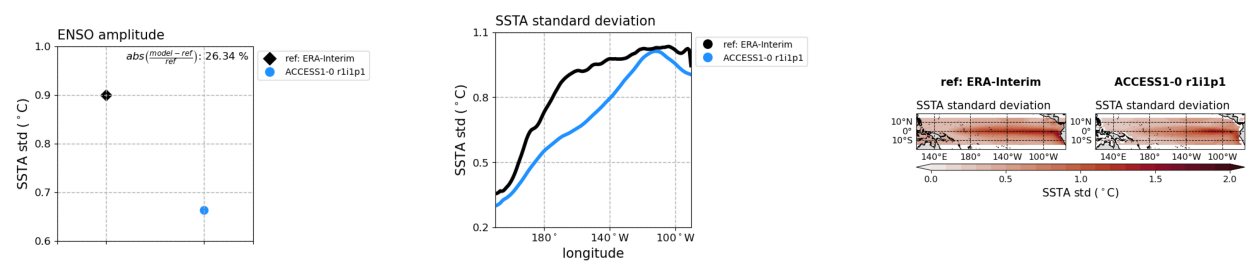

In [13]:
# figure size in inches optional
rcParams['figure.figsize'] = 16, 10

# path to images
plot1 = os.path.join(demo_output_directory,"basicTestEnso/ENSO_tel/cmip5_historical_ENSO_tel_ACCESS1-0_r1i1p1_EnsoAmpl_diagnostic_divedown01.png")
plot2 = os.path.join(demo_output_directory,"basicTestEnso/ENSO_tel/cmip5_historical_ENSO_tel_ACCESS1-0_r1i1p1_EnsoAmpl_diagnostic_divedown02.png")
plot3 = os.path.join(demo_output_directory,"basicTestEnso/ENSO_tel/cmip5_historical_ENSO_tel_ACCESS1-0_r1i1p1_EnsoAmpl_diagnostic_divedown03.png")

# display images
fig, ax = plt.subplots(1,3); ax[0].axis('off'); ax[1].axis('off'); ax[2].axis('off')
ax[0].imshow(mpimg.imread(plot1))
ax[1].imshow(mpimg.imread(plot2))
ax[2].imshow(mpimg.imread(plot3))

Finally, this example runs the remaining metrics collection ENSO_proc:

In [14]:
%%bash -s "$demo_output_directory"
enso_driver.py -p basic_enso_param.py \
--metricsCollection ENSO_proc \
--results_dir $1/basicTestEnso/ENSO_proc

mip: cmip5
exp: historical
models: ['ACCESS1-0']
realization:  r1i1p1
mc_name: ENSO_proc
outdir: demo_output/basicTestEnso/ENSO_proc
netcdf_path: demo_output/basicTestEnso/ENSO_proc
debug: False
obs_cmor: True
obs_cmor_path: demo_data/obs4MIPs_PCMDI_monthly
egg_pth: /Users/lee1043/mambaforge/envs/pmp_devel_20241202/share/pmp
output directory for graphics:demo_output/basicTestEnso/ENSO_proc
output directory for diagnostic_results:demo_output/basicTestEnso/ENSO_proc
output directory for metrics_results:demo_output/basicTestEnso/ENSO_proc
list_variables: ['ssh', 'sst', 'taux', 'thf']
list_obs: ['AVISO-1-0', 'ERA-INT', 'GPCP-2-3', 'HadISST-1-1']
Observation dataset AVISO-1-0 is not given for variable thf
Observation dataset GPCP-2-3 is not given for variable thf
Observation dataset HadISST-1-1 is not given for variable thf
PMPdriver: dict_obs readin end
Process start:Wed Dec  4 01:07:56 2024
models: ['ACCESS1-0']
 ----- model:  ACCESS1-0  ---------------------
PMPdriver: var loop start for

/Users/lee1043/mambaforge/envs/pmp_devel_20241202/lib/python3.10/site-packages/cdms2/MV2.py:318: Warning: arguments order for compress function has changed
it is now: MV2.copmress(array,condition), if your code seems to not react or act wrong to a call to compress, please check this
  warnings.warn(


               EnsoUvcdatToolsLib ReadAndSelectRegion
                         hfls sign reversed
     range old = +1.99 to +290.82
     range new = -290.82 to -1.99
               EnsoUvcdatToolsLib ReadAndSelectRegion
                         hfss sign reversed
     range old = -3.28 to +62.31
     range new = -62.31 to +3.28
               EnsoUvcdatToolsLib AverageMeridional
               EnsoUvcdatToolsLib AverageMeridional
     ComputeMetric: twoVarmetric = ERA-Interim_ERA-Interim
                         NOTE: Estimated landmask applied
                         NOTE: Estimated landmask applied
               EnsoUvcdatToolsLib ReadAndSelectRegion
                         hfls sign reversed
     range old = +3.32 to +219.02
     range new = -219.02 to -3.32
                         NOTE: Estimated landmask applied
               EnsoUvcdatToolsLib ReadAndSelectRegion
                         hfss sign reversed
     range old = -4.19 to +33.07
     range new = -33.07 to +4.19
   

INFO::2024-12-04 01:16::pcmdi_metrics:: Results saved to a json file: /Users/lee1043/Documents/Research/git/pcmdi_metrics_20230620_pcmdi/pcmdi_metrics/doc/jupyter/Demo/demo_output/basicTestEnso/ENSO_proc/cmip5_historical_ENSO_proc_basicTestEnso_ACCESS1-0_r1i1p1.json
2024-12-04 01:16:41,607 [INFO]: base.py(write:422) >> Results saved to a json file: /Users/lee1043/Documents/Research/git/pcmdi_metrics_20230620_pcmdi/pcmdi_metrics/doc/jupyter/Demo/demo_output/basicTestEnso/ENSO_proc/cmip5_historical_ENSO_proc_basicTestEnso_ACCESS1-0_r1i1p1.json
2024-12-04 01:16:41,607 [INFO]: base.py(write:422) >> Results saved to a json file: /Users/lee1043/Documents/Research/git/pcmdi_metrics_20230620_pcmdi/pcmdi_metrics/doc/jupyter/Demo/demo_output/basicTestEnso/ENSO_proc/cmip5_historical_ENSO_proc_basicTestEnso_ACCESS1-0_r1i1p1.json
INFO::2024-12-04 01:16::pcmdi_metrics:: Results saved to a json file: /Users/lee1043/Documents/Research/git/pcmdi_metrics_20230620_pcmdi/pcmdi_metrics/doc/jupyter/Demo/dem

figure plotting start
metrics: ['BiasSstLonRmse', 'BiasTauxLonRmse', 'EnsoAmpl', 'EnsodSstOce_2', 'EnsoFbSshSst', 'EnsoFbSstTaux', 'EnsoFbSstThf', 'EnsoFbTauxSsh', 'EnsoSeasonality', 'EnsoSstLonRmse', 'EnsoSstSkew']
filename_js: demo_output/basicTestEnso/ENSO_proc/cmip5_historical_ENSO_proc_basicTestEnso_ACCESS1-0_r1i1p1.json
met: BiasSstLonRmse
filename_nc: demo_output/basicTestEnso/ENSO_proc/cmip5_historical_ENSO_proc_basicTestEnso_ACCESS1-0_r1i1p1_BiasSstLonRmse.nc
figure_name: cmip5_historical_ENSO_proc_ACCESS1-0_r1i1p1_BiasSstLonRmse
                    curve 01:16
                              took 0 minute(s)
                    map 01:16
                              took 0 minute(s)
figure plotting done
met: BiasTauxLonRmse
filename_nc: demo_output/basicTestEnso/ENSO_proc/cmip5_historical_ENSO_proc_basicTestEnso_ACCESS1-0_r1i1p1_BiasTauxLonRmse.nc
figure_name: cmip5_historical_ENSO_proc_ACCESS1-0_r1i1p1_BiasTauxLonRmse
                    curve 01:16
                          

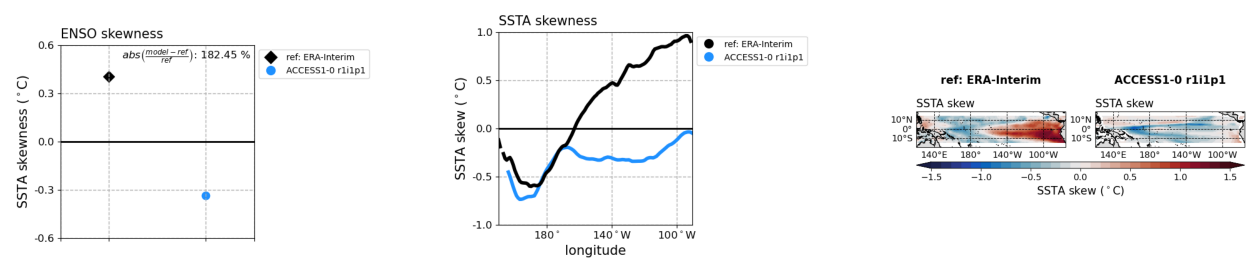

In [15]:
# figure size in inches optional
rcParams['figure.figsize'] = 16, 10

# path to images
plot1 = os.path.join(demo_output_directory,"basicTestEnso/ENSO_proc/cmip5_historical_ENSO_proc_ACCESS1-0_r1i1p1_EnsoSstSkew_diagnostic_divedown01.png")
plot2 = os.path.join(demo_output_directory,"basicTestEnso/ENSO_proc/cmip5_historical_ENSO_proc_ACCESS1-0_r1i1p1_EnsoSstSkew_diagnostic_divedown02.png")
plot3 = os.path.join(demo_output_directory,"basicTestEnso/ENSO_proc/cmip5_historical_ENSO_proc_ACCESS1-0_r1i1p1_EnsoSstSkew_diagnostic_divedown03.png")

# display images
fig, ax = plt.subplots(1,3); ax[0].axis('off'); ax[1].axis('off'); ax[2].axis('off')
ax[0].imshow(mpimg.imread(plot1))
ax[1].imshow(mpimg.imread(plot2))
ax[2].imshow(mpimg.imread(plot3))